In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Data Collection

In [2]:
data = pd.read_csv(r"C:\Users\bobby\Desktop\Python\Insurance DataSet\insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()  # No missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Cleaning 

In [4]:
data = data[~data.duplicated()]   # Drop the duplicate rows
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data["sex"].value_counts()   # Check if there are any inconsistent text or typos on sex columns

sex
male      675
female    662
Name: count, dtype: int64

In [6]:
data["smoker"].value_counts()  # Check if there are any inconsistent text or typos on smoker columns

smoker
no     1063
yes     274
Name: count, dtype: int64

In [7]:
data["region"].value_counts() # Check if there are any inconsistent text or typos on region columns

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

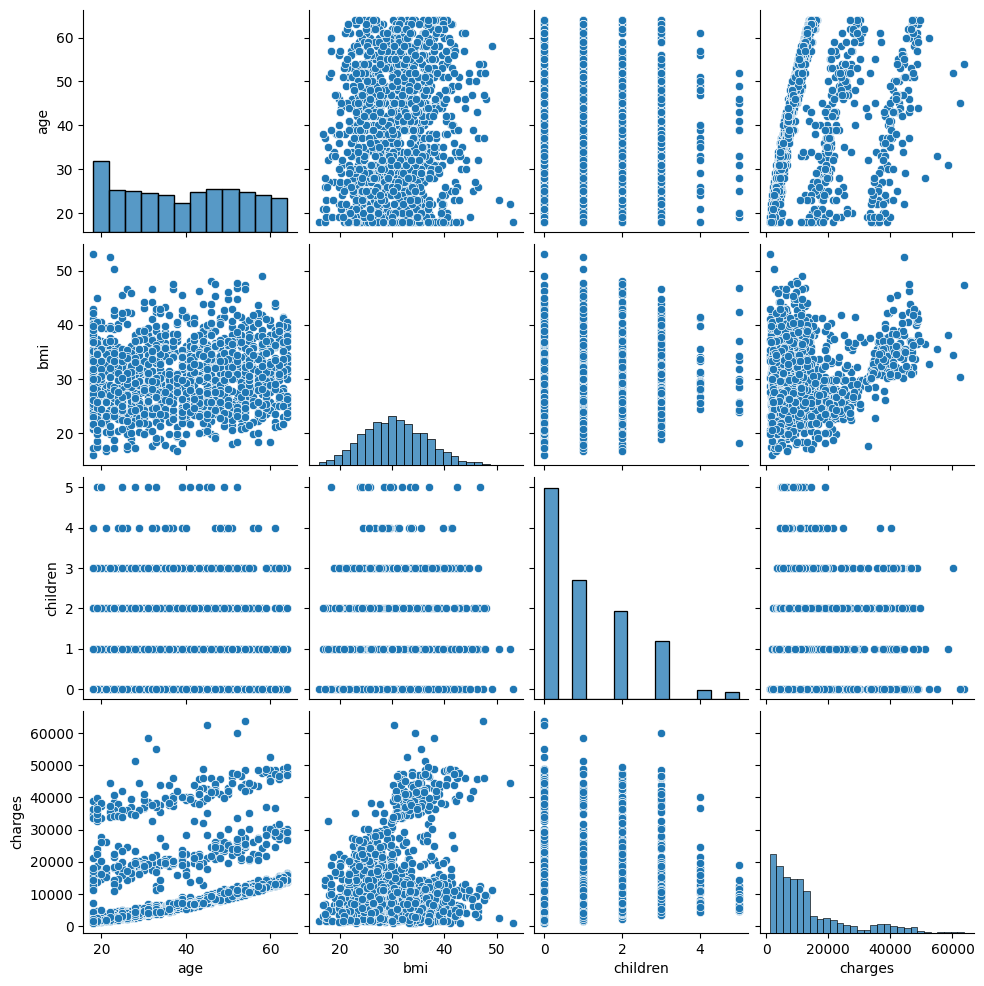

In [8]:
sns.pairplot(data);  # Check if there are any distributions with potential outliers

<Axes: xlabel='charges'>

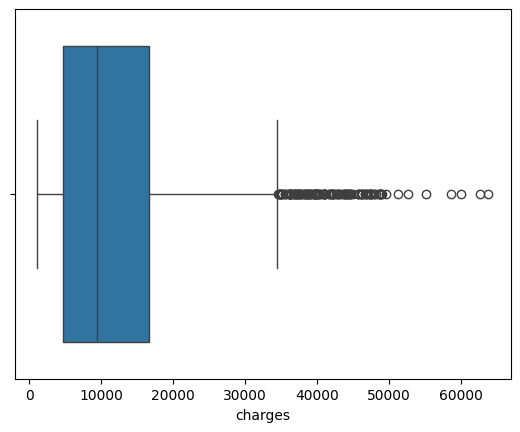

In [9]:
charges = data["charges"]
q25, q75 = np.percentile(charges, (25,75))
iqr = q75 - q25 
min = q25 - 3*iqr 
max = q75 + 3*iqr
sns.boxplot(x=charges)

<Axes: xlabel='charges', ylabel='Count'>

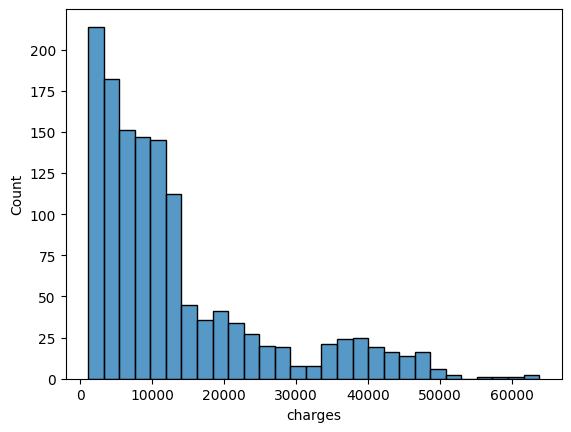

In [10]:
sns.histplot(x=charges)

In [11]:
charges_outliers = data.loc[charges > max]  # remove the outliers 3*IQR away from the 75th percentile value. The reason for 3*IQR is that from the histogram, 
charges_outliers                     # the values on the range 60,000 charges is 3*IQR away from the 75th percentile value which is extreme case distance for outliers while the 
                               # values in the 1.5*iqr range were mostly a part of the distribution
                               #Insights: We can see from the outliers that only few cases were being charged high and they all have health issues  (All of them are smokers and have obese BMI range)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [12]:
data = data.loc[charges < max]
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Exploratory Data Analysis

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data.loc[:, ("age", "bmi", "children", "charges")].corr()

,age,bmi,children,charges
age,1.000000,0.107778,0.042298,0.300627
bmi,0.107778,1.000000,0.014797,0.188628
children,0.042298,0.014797,1.000000,0.075876
charges,0.300627,0.188628,0.075876,1.000000


 * There are no strong correlations among the numerical variables

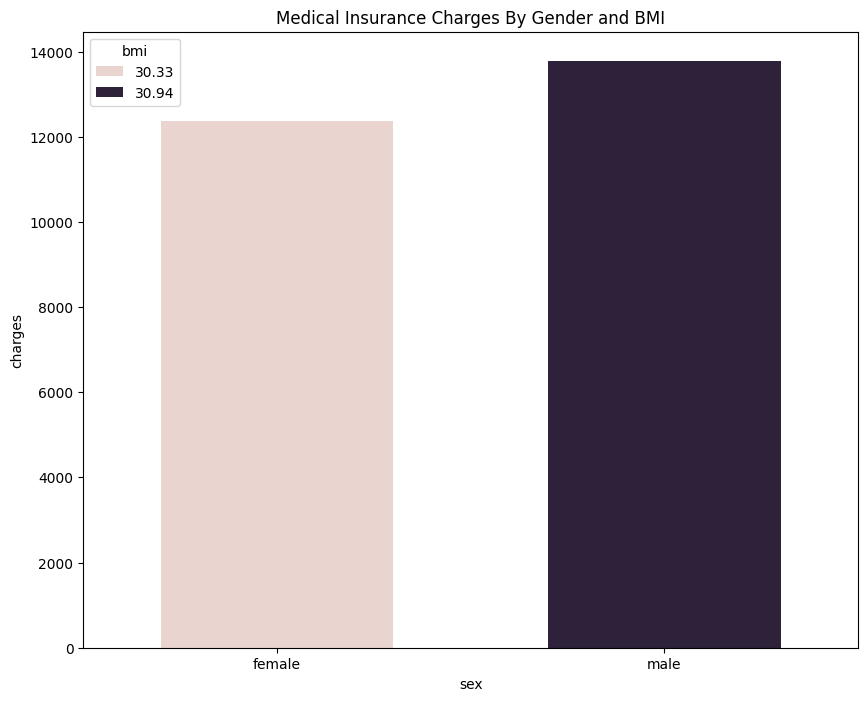

In [15]:
bmi_sex = data.groupby("sex")[["bmi", "charges"]].mean().round(2).reset_index().set_index("sex")
bmi_sex

fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data=bmi_sex, x=bmi_sex.index, y=bmi_sex.charges, hue=bmi_sex.bmi, width=0.6);
ax.set_title("Medical Insurance Charges By Gender and BMI");

* As we can observe, male group is slightly charged higher by the medical insurance because they have higher average obese BMI index than the female group which makes them more prone to health issues

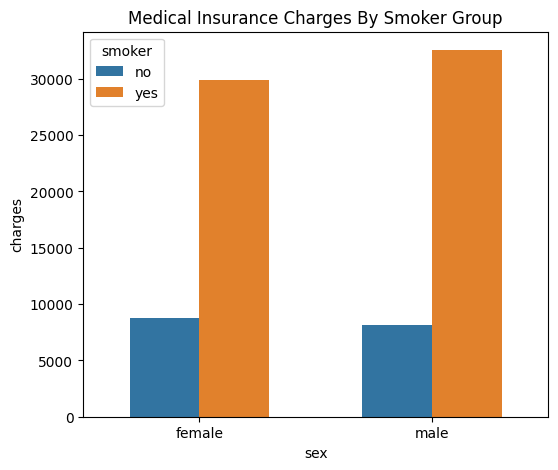

In [16]:
smoker_sex = data.groupby(["sex", "smoker"])[["charges"]].mean().round(2).reset_index().set_index("sex")
smoker_sex


fig, ax = plt.subplots(figsize = (6,5));
sns.barplot(data=smoker_sex, x=smoker_sex.index, y=smoker_sex.charges, hue = smoker_sex.smoker, width=0.6);
ax.set_title("Medical Insurance Charges By Smoker Group");

* As we can observe, smoker group were being charged more than non-smoker maybe because they have higher risk of health issues than the non-smoker group

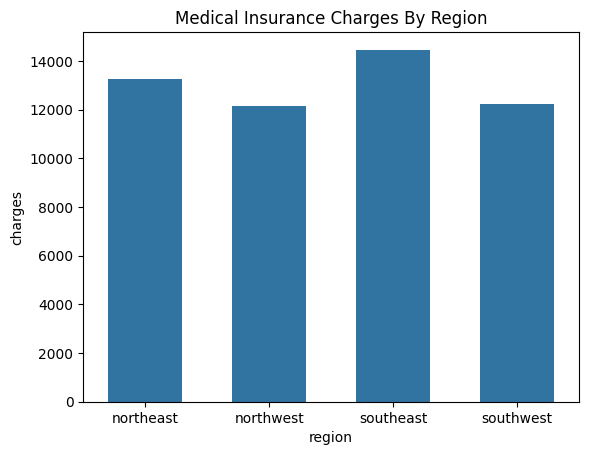

In [17]:
region = data.groupby("region")[["charges"]].mean()

fig, ax = plt.subplots()
sns.barplot(data=region, x=region.index, y=region.charges, width=0.6);
ax.set_title("Medical Insurance Charges By Region");

* People lived in the southeast region charged more than the rest of the regions